In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

In [3]:
def read_and_clean(filename):
    '''
    Function takes input as filename to be cleaned. Rows that have values of nan are deleted. 
    Remaining rows are returned as an ndarray.
    '''
    data = np.genfromtxt(fname)
    data = np.delete(data, np.where(np.isnan(data))[0], axis=0)
    
    return data

<i>Using the convolve function was not an original idea - I would like to thank Stackoverflow for this.</i>

In [7]:
def smooth_data(data, width):
    '''
    This function takes the rolling/moving average of the fluxes - second column of the 'data' array
    This is done by using the numpy.convolve method. 
    '''
    return np.convolve(data[:,1], np.ones(width), 'valid')/width # This returns along with the 'side' 
                                                                 # values for now - these are to be exluded later
    

In [5]:
def plot_light_curve(data):
    plt.plot(data[:,0], data[:,1], ',')


In [89]:
def find_freq(data, max_freq = 2000, n_bins = 100):
    freq_range = np.linspace(0.1, max_freq, 100)
    # print(data[:,1][:10], data[:,0][:10])
    # temp = sc.signal.lombscargle(data[:,0], data[:,1], freq_range, normalize = False)
    FFT = sc.fft.fft(data[:,1])
    FFT = np.abs(FFT)**2
    freqs = sc.fft.fftfreq(data[:,1].size, d=0.001)
    # sample_freq[:sig.size//2], power[:sig.size//2]
    print(data[:,1][:10], data[:,0][:10])
    plt.plot(freqs[:dat[:,1].size//2], FFT[:dat[:,1].size//2])

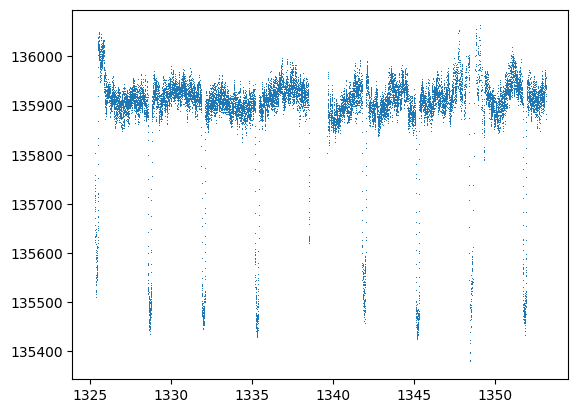

[135747.125      135801.125      135755.90625    135735.81026786
 135730.88169643 135724.02678571 135713.37946429 135708.99776786
 135714.90401786 135715.77455357] [1325.30137222 1325.30276113 1325.30415004 1325.30553895 1325.30692786
 1325.30831677 1325.30970568 1325.31109459 1325.3124835  1325.31387241]


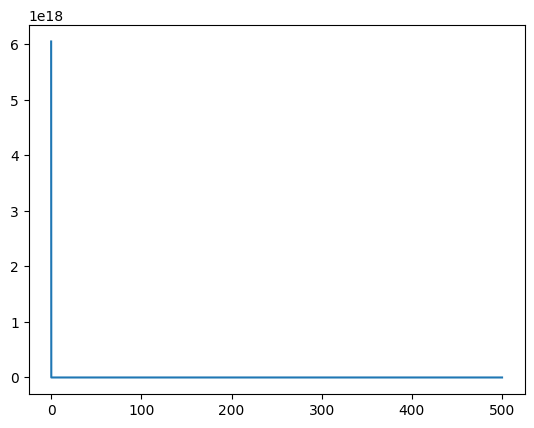

In [90]:
fname = 'Data/tess_lc1.dat'
window_length = 7  # has to be odd as you need to take the same number of values on either side of the cell
dat = read_and_clean(fname)

dat[:,1][int((window_length-1)/2):-int((window_length-1)/2)] = smooth_data(dat,window_length)
plt.plot(dat[:,0], dat[:,1], ',')
plt.show()
find_freq(dat, 10, 100)


# plt.xlim(1331, 1333)

